In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('Monthly_data_cmo.csv')

In [ ]:
df

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra


In [ ]:
duplicates = df['district_name'].duplicated()
duplicates.sum()

62396

In [ ]:
print(duplicates)

0        False
1         True
2         True
3         True
4         True
         ...  
62424     True
62425     True
62426     True
62427     True
62428     True
Name: district_name, Length: 62429, dtype: bool


In [ ]:
df


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Ahmadnagar,Maharashtra


In [ ]:
df.drop('district_name',inplace=True,axis=1)

In [ ]:
df


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Maharashtra
...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11,Maharashtra


In [ ]:
# Assuming your DataFrame is named 'df'

# Filter the data for Garlic at Satara APMC
filtered_data = df[(df['APMC'] == 'Satara') & (df['Commodity'] == 'Garlic')]

# Convert the 'date' column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Sort the data by date
filtered_data = filtered_data.sort_values(by='date')

# Set the 'date' column as the index and extract the 'modal_price'
time_series_data = filtered_data.set_index('date')['modal_price']


<ipython-input-18-51f5188557d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

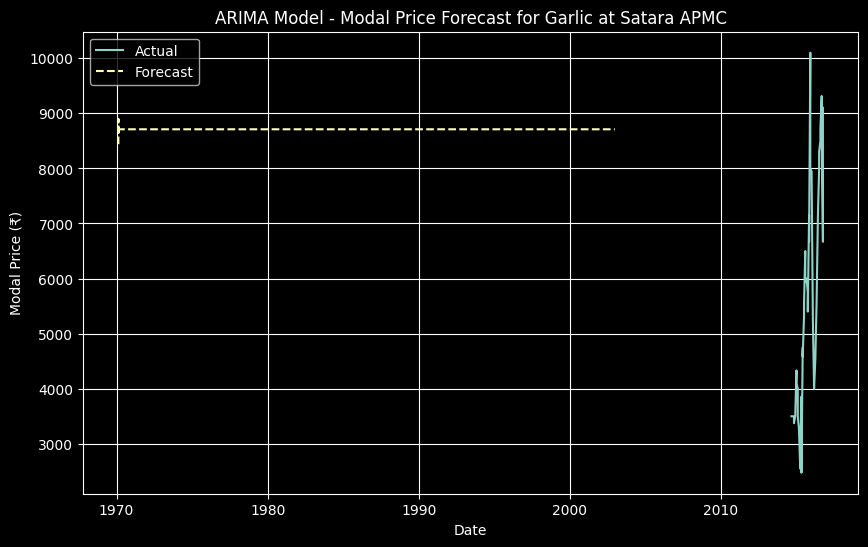

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (order can be adjusted)
model = ARIMA(time_series_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions (for the next 12 periods)
forecast = model_fit.forecast(steps=12000)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model - Modal Price Forecast for Garlic at Satara APMC')
plt.xlabel('Date')
plt.ylabel('Modal Price (₹)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(forecast)

44       8438.785531
45       8898.498178
46       8578.880674
47       8801.096333
48       8646.599791
            ...     
12039    8709.961640
12040    8709.961640
12041    8709.961640
12042    8709.961640
12043    8709.961640
Name: predicted_mean, Length: 12000, dtype: float64


In [ ]:
print(filtered_data)

         APMC Commodity  Year      Month  arrivals_in_qtl  min_price  \
50590  Satara    Garlic  2014  September              125       2000   
50613  Satara    Garlic  2014  September               63       2000   
50294  Satara    Garlic  2014    October               42       2000   
50271  Satara    Garlic  2014    October              126       2000   
50003  Satara    Garlic  2014   November               45       2000   
49989  Satara    Garlic  2014   November               98       2250   
48576  Satara    Garlic  2014   December              116       2000   
49005  Satara    Garlic  2015    January               98       2667   
48991  Satara    Garlic  2015    January              114       2600   
48781  Satara    Garlic  2015   February              308       2667   
48796  Satara    Garlic  2015   February               24       2000   
49591  Satara    Garlic  2015      March              222       1944   
48170  Satara    Garlic  2015      April             3316       

In [ ]:
# Assuming your DataFrame is named 'df'

# Filter the data for Garlic at Satara APMC
bajri_data = df[(df['APMC'] == 'Satara') & (df['Commodity'] == 'Bajri')]

# Convert the 'date' column to datetime
bajri_data['date'] = pd.to_datetime(bajri_data['date'])

# Sort the data by date
bajri_data = bajri_data.sort_values(by='date')

# Set the 'date' column as the index and extract the 'modal_price'
time_series_data =bajri_data.set_index('date')['modal_price']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observa

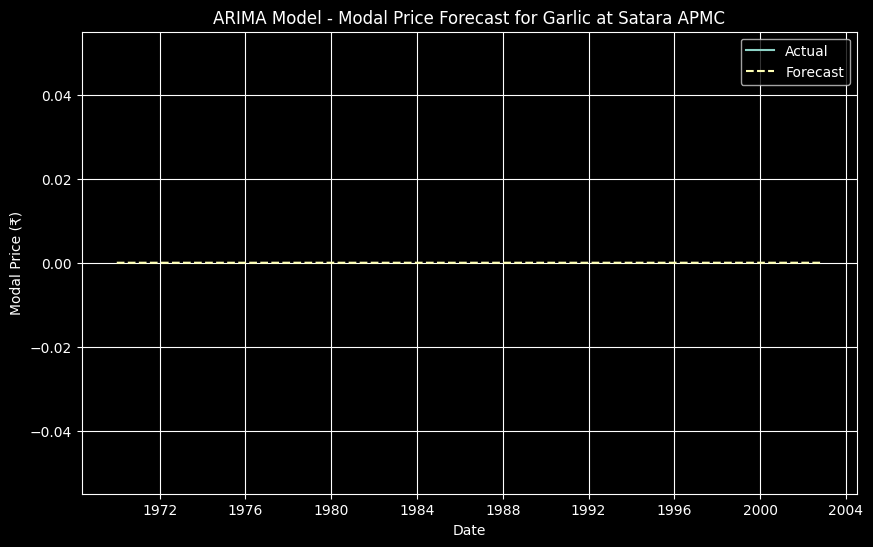

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (order can be adjusted)
model = ARIMA(time_series_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions (for the next 12 periods)
forecast = model_fit.forecast(steps=12000)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model - Modal Price Forecast for Garlic at Satara APMC')
plt.xlabel('Date')
plt.ylabel('Modal Price (₹)')
plt.legend()
plt.grid(True)
plt.show()
